# Ridge Linear Regression

# Libraries

In [ ]:
#Basic scientific math, data shape, and data file libraries for data pre-processing
import io 
import numpy as np 
import pandas as pd

#Plotting 
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV

# Loading 

First, we will mount the drive & load the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
robo_bohr = pd.read_csv('/content/gdrive/My Drive/DS/molecules/roboBohr.csv', index_col = 0)
robo_bohr 

,0,1,2,3,4,5,6,7,8,9,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16268,73.516695,20.753166,18.624076,17.872009,17.851690,17.851254,17.742176,14.655754,12.706683,12.557785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74976,-8.876123
16269,73.516695,20.724740,18.579933,17.741621,14.716676,13.697829,13.697558,13.653512,13.652942,13.652387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74977,-13.105268
16270,53.358707,20.820797,19.150234,19.148721,15.135514,15.123685,12.942704,12.938162,12.488633,12.488061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74978,-16.801464
16271,53.358707,15.707759,15.707644,13.653838,13.653570,13.653314,13.652591,13.652585,13.652550,12.743890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74979,-13.335088


# Pre-processing

We define the design matrix containing all the features except the 'Eat' column, which stores energy of atomization per molecule. We assign 'Eat' to y because this is the target objects with the labels we want our model to use for predictions. Then, X is standardize for consistency accross values on the matrix and y is centralized.

In [ ]:
X = robo_bohr.drop(['Eat'], axis = 1)
y = robo_bohr['Eat']

In [ ]:
standardize = StandardScaler()
y_center = StandardScaler(with_std = False)

In [ ]:
X= standardize.fit_transform(X)
X = pd.DataFrame(X)

Review that values were standardize on X

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275
0,-0.372795,-0.534448,-1.043596,-0.936145,-0.855299,-0.806195,-0.695008,-0.583679,-0.468653,-0.349884,...,-0.049014,-0.049015,-0.049013,11.309499,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345475
1,-0.372795,-0.207476,-0.253760,-0.098378,0.130369,0.491641,0.699988,0.930156,0.567022,0.561288,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345432
2,-0.372795,-0.532992,-1.038028,-0.944372,-0.866204,-0.819541,-0.722963,-0.637582,-1.053761,-1.517533,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345390
3,-0.372795,-0.527745,-0.339355,-0.102870,0.123643,0.486547,-0.662823,-0.546362,-0.429896,-0.324998,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345262
4,-0.372795,-0.526820,-0.339746,-0.102590,0.117769,-0.791526,-0.680220,-0.577064,-1.001983,-0.913487,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,-0.372795,-0.195461,-0.241207,-0.101389,0.123783,0.486742,0.671568,0.052590,-0.373567,-0.288813,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,1.784976
16238,-0.372795,-0.198744,-0.246962,-0.121493,-0.444938,-0.507005,-0.369525,-0.233523,-0.091693,0.059716,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,1.785019
16239,-0.550877,-0.187651,-0.172610,0.095465,-0.368957,-0.165855,-0.563826,-0.437735,-0.438520,-0.311014,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,1.785062
16240,-0.550877,-0.778117,-0.621434,-0.751781,-0.637796,-0.517656,-0.381100,-0.233787,-0.091810,-0.229556,...,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,1.785104


Review values were centralize on the target labels for predictions stored on the vector called 'y'

In [ ]:
y -= np.mean(y)
y

0       -7.834793
1        1.017950
2        1.802350
3       -2.597469
4        2.641829
           ...   
16268    2.302846
16269   -1.926299
16270   -5.622495
16271   -2.156118
16272   -2.157726
Name: Eat, Length: 16242, dtype: float64

# Data and model assumptions 

We assume that we will reach the minimum of the cost function within a fixed number of steps, with the number of iterations being 1000. 

* Each molecule is composed of a subset of the elements from the set C,H, N, O, P and S (CHNOPS) and has at least 2, at most 50 atoms.
* The maximum distance between two atoms in a molecule does not exceed 25 a0 (a0 = 0.529 ˚A, i.e. Bohr radius), for convergence of plane-wave calculations, where each molecule
is placed in a cubic box of side length 30 a0.
*  There is an even number of electrons
in the molecule.
<br>

Applying these criteria to the first 75,000 entries in the PubChem database
leads to a subset of 16,242 molecules, whose structure data files (SDF) are converted into
input files for electronic structure calculations

#1. Illustrating the effect of the tuning parameter on the inferred ridge regression coefficients

Creare a plot of 1275 lines (one for each
of the 𝑝 = 1275 features), with the 𝑦-axis as 𝛽̂
𝑗
, 𝑗 = 1,2, …,1275, and the 𝑥-axis the corresponding
log-scaled tuning parameter value log10(𝜆) that generated the particular 𝛽̂
𝑗

<br>
Note: Without the log scaling of the tuning parameter, the plot will look distorted. 


In [ ]:
lambdas = [10e-2, 10e-1, 10e0, 10e1, 10e2,10e3,10e4]
beta_list = []

for lamb in lambdas:
  ridge = Ridge(alpha = lamb, max_iter = 1000)
  ridge.fit(X,y)
  beta_list.append(ridge.coef_)

No handles with labels found to put in legend.


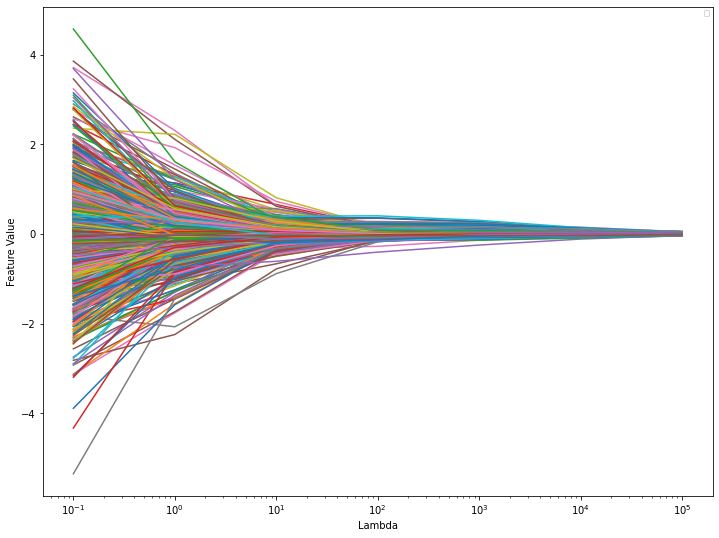

In [ ]:
betas = pd.DataFrame(beta_list)
betas.index = lambdas

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Feature Value')
plt.legend(loc = 'upper right', fontsize = 'x-small')
plt.show()

# 2. Displaying the effect of the tuning parameter on the cross validation error(5)

The 𝑥- axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular CV(5) error. Without the log scaling of the tuning parameter, the plot will look distorted.

In [ ]:
ridge = Ridge(max_iter = 1000)

parameters ={'alpha': [1e-2,1e-1,1,10,1e2,1e3,1e4]}

mse = make_scorer(mean_squared_error, greater_is_better = False)

ridge_regressor = GridSearchCV(ridge,parameters, scoring = mse, cv = 5, refit = False)

ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(max_iter=1000),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100.0, 1000.0, 10000.0]},
             refit=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

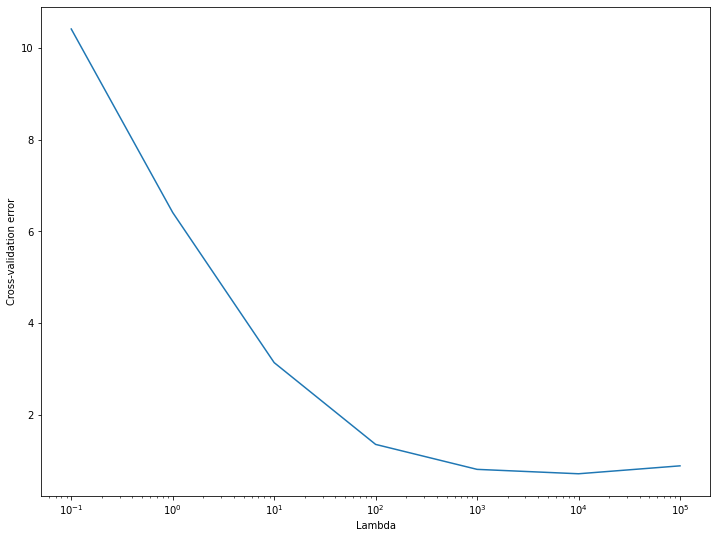

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(lambdas, np.absolute(ridge_regressor.cv_results_['mean_test_score']))
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation error')
plt.show()

#3. Showing the value of λ that generated the smallest CV(5) error.

Then, we indicate the value of 𝜆 that generated the smallest CV(5) error

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_) 

{'alpha': 1000.0}
-0.7134341359581594


**Final Analysis**



**Insight 1**
<br>
The alpha value of 1000 suggests that this is the tuning parameter lambda that will generate the model with the lowest cross validation error. From the graph above, 10,000 seems to produce the lowest error. The difference may be because, usually, we want the simplest possible model with the lowest possible cross-validation error. 

**Insight 2**
<br>
The second value for 'ridge_regressor.best_score_' is the mean cross-validated score of the best_estimator. The mean can be positive or negative. This served as an additional metric to describe the best predictor. Maybe displaying the mean square error may be more informative. It could be a good approach to compare these results with those to be obtained without using statistical or ML libraries and provide a discussion as to why the results are different if applicable.

# 4. Retraining the model on the entire dataset of N = 16242 observations and providing the estimates of the p = 1275 best-fit model parameters using the optimal value of lambda = 1000.

 Given the optimal 𝜆, let's retrain the model on the entire dataset of 𝑁 = 16242
observations and provide the estimates of the 𝑝 = 1275 best-fit model parameters.

In [ ]:
ridge = Ridge(alpha=1000)
print(ridge.fit(X,y))
print("Ridge parameters:",ridge.get_params(deep=True))
print("Ridge score using the whole dataset:",ridge.score(X, y, sample_weight=None))

Ridge(alpha=1000)
Ridge parameters: {'alpha': 1000, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Ridge score using the whole dataset: 0.9559802685641454


The **score suggests** the trained model can make accurate predictions approximately 95.6% of the time.